# JUPYTER NOTEBOOK FOR HOMEWORK 1
PART 1 - Sharpen a blurred colored image using a Gaussian filter

In [2]:
import numpy as np
import skimage
import skimage.color
import skimage.draw
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import os
import scipy.misc as sm
from scipy import ndimage as ndimage
from scipy.ndimage.filters import convolve

#Read and display the image to analyze
def load_img(filename):
    if os.path.isfile(os.getcwd() + '/' + filename):
        img = mpimg.imread(filename)
    return img

#Create a Gaussian filter of n x n size and width sigma
def gaussian_filter(n, sigma=1):
    n = int(n) // 2
    x, y = np.mgrid[-n:n+1, -n:n+1]
    g =  (np.exp(-((x**2 + y**2) / (2.0*sigma**2)))) / (2.0 * np.pi * sigma**2)
    return g
 

#draw a circular patch on a color image Img; the patch is centered at r,c, with radius rad
#and color col (0-black; 1-red; 2-cyan; 3-green)
#Note that this function directly modifies Img. 
def draw_patch(Img, r, c, rad=7,col=1): 
    newImg = Img[:,:,:]
    if col == 2:
        p = [0,1.0,1.0] #cyan
    else:
        p = [0,1.0,0.0] #green
    if col == 1: 
        p = [1.0,0.0,0.0]#red
    if col == 0: 
        p = [0.0,0.0,0.0]#black
        
    rr, cc = skimage.draw.disk((r, c, rad))
    newImg[rr,cc,0:3]= p       
    return newImg
        

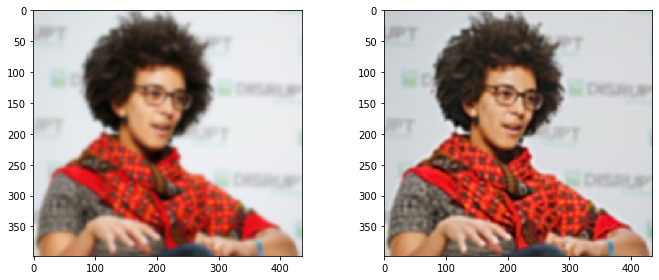

In [3]:
#1. Load your image of choice.
img = load_img("images/timnit_blur.jpg")

#2. Create a Gaussian filter here
filte = gaussian_filter(35,3)

#3. Next, convert your image to L.a.b. color scale
lab = skimage.color.rgb2lab(img)

#4. Extract the first channel to get the intensity-only image. Say this results in L
L = []
for row in range(0,len(lab)):
    newArr = []
    for collumn in range(0,len(lab[row])):
        newArr.append(lab[row][collumn][0])
    L.append(newArr[:])

#5. Convolve this new image L with the filter g to get a smoothed image Simg
Simg = convolve(L, filte)

#6. Create a new image by multiplying L by a small constant r and Simg by another small constant s
r = 1/7
s = 1/12
for row in range(0,len(L)):
    for collumn in range(0,len(L[row])):
        L[row][collumn] = L[row][collumn] * r
        Simg[row][collumn] = Simg[row][collumn] * s
newL = L - Simg

#7. Normalize your new image so that its values are between 0 and 100
norm = []
finalMax = -float('inf') -1
finalMin = float('inf')
for row in range(0,len(newL)):
    minimum = min(newL[row])
    maximum = max(newL[row])
    if(finalMax < maximum):
        finalMax = maximum
    if(finalMin > minimum):
        finalMin = minimum

for row in range(0,len(newL)):
    temp = []
    for collumn in range(0,len(newL[row])):
        temp.append(((newL[row][collumn]-finalMin)/(finalMax-finalMin))*100)
    norm.append(temp[:])

#8. Recombine this new L image with the previous a and b channels of the lab image in step #3.
lab2 = lab
for row in range(0,len(lab2)):
    for collumn in range(0,len(lab2[row])):
        lab2[row][collumn][0] = norm[row][collumn]

#9. Reconvert the L.a.b. image back to RGB with the command below (assuming the new L.a.b. image is called lab2)
img2 = skimage.color.lab2rgb(lab2)
#10. Examine your newly sharpened image and save it to file. Also display the original and sharpened image side-by-side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(img)
ax[1].imshow(img2)
fig.tight_layout()
plt.show()
fig.savefig("images/edited_timnit_blur.png")


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  import sys


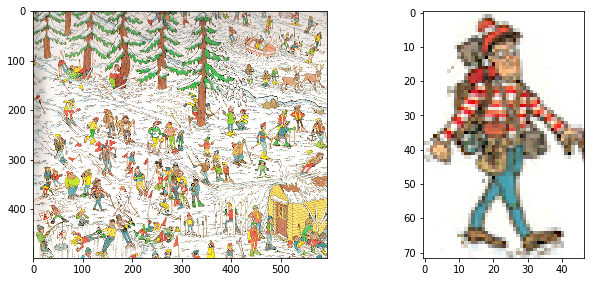

In [4]:
#1. Load the image and Waldo template
img1 = load_img('images/waldo_onIce.png')
temp1 = load_img('images/waldo_template.png')

#Convert the two images to grayscale
img = skimage.color.rgb2gray(img1)
temp = skimage.color.rgb2gray(temp1)

#Display the 2 images
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(img1)
ax[1].imshow(temp1)
fig.tight_layout()
plt.show()

In [5]:
#2. Write and call a cross-correlation function to find the best match for Waldo
from scipy.signal import correlate
def crosscorr(Img, f):
    return correlate(Img, f,'full')

corrilate = crosscorr(img,temp)
maxVal = 0
maxValIndex = [0,0]
for i in range(0,len(corrilate)):
    for j in range(0,len(corrilate[i])):
        if(corrilate[i][j]>maxVal):
            maxVal = corrilate[i][j]
            maxValIndex = [i,j]

#3. Use the helper function 'draw_patch' to place a circular cyan patch on 
# the presumed location of Waldo on the original image. Also, display the 
# image of the correlation map obtained alongside the image. 
# 
imgCopy = img1.copy()
imgCopy = draw_patch(imgCopy,maxValIndex[0],maxValIndex[1],15,2)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(corrilate, cmap='gray')
ax[1].imshow(imgCopy)
fig.tight_layout()
plt.show()


TypeError: disk() missing 1 required positional argument: 'radius'

In [ ]:
#4. Write and call a normalized cross-correlation function to find the best match for Waldo
def normcrosscorr(Img, f):
    Img = (Img - np.mean(Img)) / (np.std(Img) * len(Img))
    f = (f - np.mean(f)) / (np.std(f))
    corr = correlate(Img, f,'full')
    return corr
    
normalised = normcrosscorr(img,temp)

maxVal = 0
maxValIndex = [0,0]
for i in range(0,len(normalised)):
    for j in range(0,len(normalised[i])):
        if(normalised[i][j]>maxVal):
            maxVal = normalised[i][j]
            maxValIndex = [i,j]

#5. Again, use the helper function 'draw_patch' to place a circular green patch on 
# the presumed location of Waldo on the original image. Also, display the 
# image of the normalized correlation map obtained alongside the image. 
#

imgCopy = img1.copy()
imgCopy = draw_patch(imgCopy,maxValIndex[0],maxValIndex[1],15,2)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(normalised, cmap='gray')
ax[1].imshow(imgCopy)
fig.tight_layout()
plt.show()

In [ ]:
#6. Write and call an SSD function to find the best match for Waldo
def SSD(Img, f):
    ssdArr = []
    for i in range(0,len(Img)-len(f)):
        tempArr = []
        for j in range(0,len(Img[i])-len(f[0])):
            ssd = np.sum((Img[i:i+len(f),j:j+len(f[0])]-f[:])**2)
            tempArr.append(ssd)
        ssdArr.append(tempArr)
    return ssdArr
    
ssd = SSD(img,temp)

minVal = float('inf')
minValIndex = [0,0]
for i in range(0,len(ssd)):
    for j in range(0,len(ssd[i])):
        if(ssd[i][j]<minVal):
            minVal = ssd[i][j]
            minValIndex = [i,j]

#7. Lastly, use the helper function 'draw_patch' to place a circular red patch on 
# the presumed location of Waldo on the original image. Also, display the 
# image of the SSD map obtained alongside the image. 
# 

imgCopy = img1.copy()
imgCopy = draw_patch(imgCopy,minValIndex[0],minValIndex[1],15,2)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(ssd, cmap='gray')
ax[1].imshow(imgCopy)
fig.tight_layout()
plt.show()